## I) Le Perceptron

Le perceptron est un modèle de classification binaire capable de séparer linéairement 2 classes de points. Il est à la base des réseaux de neuronnes. Un réseau neuronne est composé de plusieurs perceptrons qui agissent comme des neuronnes distincts.

Le modèle linéaire est de la forme $f(x_1,...,x_n)=a_1x_1+...+a_nx_n+b$ avec b le biais et les $a_i$ des coeficients à déterminer. La classe de l'entré sera donnée par le signe de la fonction $f$.

Le modèle linéaire va créer une 'frontière' et plus un point sera éloigné de sa frontière et plus sa probabilité d'étre dans la classe 1 est élevé.

Pour cela on transforme une sortie $z$ en probabilité à l'aide de la la fonction logistique $a(z)=1/(1+e^{-z})$

### a) Fonction coût (EM)
En ML la loss function permet de quantifier les erreurs effectuées par un modèle.
La fonction utilisé pour cela est la fonction log Loss $L= -1/m*sum

**L'origine de cette fonction:**
**La vraisemblance indique la plausibilité du modèle vis à vis des vraies données**
On applique la formule de la vraisemblance pour la loi de bernouillie (logistique).

**Warning: On fait le produit de probabilité (ie valeurs comprisent entre  0 et 1 donc la vraisemblance convergera vers 0 quand on aura beaucoup de donnée.**

Pour remedier au problème on calcule le log vraisemblance pour avoir des sommes et plus des produits. **On a droit de le faire car la fonction et monotone croissante elle conserve donc l'ordre des termes.**

On obtiens ainsi la fonction log loss sans le coefficient $-1/m$
* le - est la car on maximise une fonction f(x) ce qui revient à minimiser -f(x) 
* le $1/m$ est là pour normaliser le resultat

### b) Minimisation(Descente de gradient)

### c) Vectorisation

La vectoriasation consiste à mettre des données dans des vecteurs, matrices ou tableaux afin d'y effectuer des opérations mathématiques. Elle permet d'ecrire des code plus simple et beaucoup plus rapide. Pour cela on transforme un matrice $X$ de dimension $m$x$n$ en un vecteur $Z$ de dimension $m$x1.
Ce vecteur aura comme valeur la transformation lineaire des observation de la matrice ie: $z_i=a_1x_1^{(i)}+...+a_nx_n^{(i)}+b$

On peut remarquer que $Z=X.A+b$ où $A$ est une matrice de dimension $n$X1

### d) Mise en pratique

Commençons par simuler 100 observations comprenant 3 groupes.
X est la dataframe des observations avec 2 variables et y est le vecteur qui indique le groupe des observations.

C:\Users\ranus\anaconda3\envs\Tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


dimensions de X: (100, 2)
dimensions de y: (100, 1)


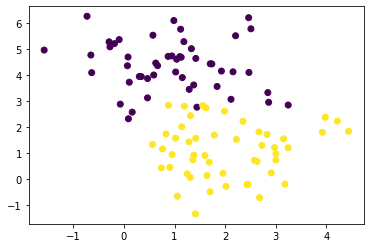

In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

X, y =make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y)
plt.show()

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score

def init(X):
    A=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (A,b)


In [3]:
def model(X,A,b):
    Z=X.dot(A)+b
    W=1/(1+np.exp(-Z))
    return W

In [4]:
def log_loss(W,y):
    return - 1 / len(y) * np.sum(y * np.log(W) + (1 - y) * np.log(1 - W))

In [5]:
def gradient(W,X,y):
    dA= 1/len(y)*np.dot(X.T, W-y)
    db= 1/len(y)*np.sum(W-y)
    return (dA, db)

In [6]:
def update(dA,db,A,b,learning_rate):
    A= A - learning_rate*dA
    b= b - learning_rate*db
    return (A,b)

In [7]:
def predict(X, A, b ):
    W = model(X, A, b)
    return A >= 0.5

In [8]:
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    A,b=init(X)
    
    Loss=[]
    
    for i in range(n_iter):
        W=model(X, A, b)
        Loss.append(log_loss(W,y))
        dA, db = gradient(W, X, y)
        A, b = update(dA, db, A, b, learning_rate)
    y_predict=predict(X, A, b)
    print(accuracy_score(y,y_predict))
    plt.plot(Loss)
    plt.show()
    return (A,b)

In [9]:
W, b = artificial_neuron(X, y)

ValueError: Found input variables with inconsistent numbers of samples: [100, 2]

## 2) Réseaux Neuronne

### 1) Première couche

Un réseau neuronne est un ensemble de neuronnes lié entre eux. Il peut etre composé de plusieurs couche eux même composé de plusieurs neuronnes.

Par exemple pour une couche composé de 4 neuronnes nous obtenons les équations suivante

$z_1^{[1]}(x_1,...,x_n)=w_1x_1+...+w_{1,nx_n}+b_1$  
$a_1^{[1]}(z_1)=1/(1+e^{-z_1})$  
  
$z_2^{[1]}(x_1,...,x_n)=w_{2,1}x_1+...+w_{2,nx_n}+b_2$  
$a_2^{[1]}(z_2)=1/(1+e^{-z_2})$ 
  
$z_3^{[1]}(x_1,...,x_n)=w_{3,1}x_1+...+w_{3,nx_n}+b_3$   
$a_3^{[1]}(z_3)=1/(1+e^{-z_3})$  
  
$z_4^{[1]}(x_1,...,x_n)=w_{4,1}x_1+...+w_{4,nx_n}+b_4$   
$a_4^{[1]}(z_4)=1/(1+e^{-z_4})$  

Chaque neuronnes possèdent leurs propre coefficient, de ce fait ils sont indépendants entre eux.

### 2) Seconde couche

* Le fonctionnement de la deuxième couche est identique à celle de la première, on remplace simplement les entrées $x_i$ par les $a_i^{[1]}$ avec $^{[j]}$ qui indique la couche et nous obtenons des équations similaires.
* Par réccurence, nous pouvons ajouter indéfiniment des couches
* Ajouter des couches permet d'effectuer des tâches plus complexe, cepandant cela augmante le temps de calcule.

Représenter toutes les équations d'un réseaux neuronne est fastidieux dans le cas ou il y a de nombreuse couche, il est donc judicieux de vectoriser les équations. Ainsi, chaque couche peut s'écrire sous forme d'équation matricielle.  
  
Pour la première couche:  
$Z^{[1]}=X*W^{[1]}+b^{[1]}$
  
Pour la seconde couche:  
$Z^{[2]}=W^{[1]}*W^{[2]}+b^{[2]}$  
  
Pour la n-ième couche:  
$Z^{[n]}=W^{[n-1]}*W^{[n]}+b^{[n]}$  

## 3) Mise en pratique

### Tensorflow


In [1]:
#import tensorflow as tf

#model= keras.Sequential([keras.layers.Dense(units=1 , input_shape=[1])])

import tensorflow as tf
import numpy as np
from tensorflow import keras
print(tf.__version__)

model = tf.keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

C:\Users\ranus\anaconda3\envs\Tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2.8.2


In [2]:
#on creer les données d'entrainements

xs=np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
ys=np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0])
model.fit(xs,ys,epochs=500)


Epoch 1/500
1/1 [==============================] - 0s 385ms/step - loss: 14.4307
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 11.5904
Epoch 3/500
1/1 [==============================] - 0s 0s/step - loss: 9.3510
Epoch 4/500
1/1 [==============================] - 0s 0s/step - loss: 7.5843
Epoch 5/500
1/1 [==============================] - 0s 0s/step - loss: 6.1897
Epoch 6/500
1/1 [==============================] - 0s 16ms/step - loss: 5.0879
Epoch 7/500
1/1 [==============================] - 0s 0s/step - loss: 4.2166
Epoch 8/500
1/1 [==============================] - 0s 0s/step - loss: 3.5267
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 2.9797
Epoch 10/500
1/1 [==============================] - 0s 0s/step - loss: 2.5450
Epoch 11/500
1/1 [==============================] - 0s 0s/step - loss: 2.1990
Epoch 12/500
1/1 [==============================] - 0s 16ms/step - loss: 1.9227
Epoch 13/500
1/1 [==============================] - 0s 0s/ste

1/1 [==============================] - 0s 0s/step - loss: 0.0168
Epoch 209/500
1/1 [==============================] - 0s 0s/step - loss: 0.0164
Epoch 210/500
1/1 [==============================] - 0s 0s/step - loss: 0.0161
Epoch 211/500
1/1 [==============================] - 0s 16ms/step - loss: 0.0157
Epoch 212/500
1/1 [==============================] - 0s 0s/step - loss: 0.0154
Epoch 213/500
1/1 [==============================] - 0s 0s/step - loss: 0.0151
Epoch 214/500
1/1 [==============================] - 0s 0s/step - loss: 0.0148
Epoch 215/500
1/1 [==============================] - 0s 16ms/step - loss: 0.0145
Epoch 216/500
1/1 [==============================] - 0s 0s/step - loss: 0.0142
Epoch 217/500
1/1 [==============================] - 0s 0s/step - loss: 0.0139
Epoch 218/500
1/1 [==============================] - 0s 0s/step - loss: 0.0136
Epoch 219/500
1/1 [==============================] - 0s 16ms/step - loss: 0.0133
Epoch 220/500
1/1 [==============================] - 0s 0s/s

1/1 [==============================] - 0s 16ms/step - loss: 2.4796e-04
Epoch 412/500
1/1 [==============================] - 0s 0s/step - loss: 2.4287e-04
Epoch 413/500
1/1 [==============================] - 0s 0s/step - loss: 2.3788e-04
Epoch 414/500
1/1 [==============================] - 0s 0s/step - loss: 2.3299e-04
Epoch 415/500
1/1 [==============================] - 0s 16ms/step - loss: 2.2820e-04
Epoch 416/500
1/1 [==============================] - 0s 0s/step - loss: 2.2352e-04
Epoch 417/500
1/1 [==============================] - 0s 0s/step - loss: 2.1893e-04
Epoch 418/500
1/1 [==============================] - 0s 0s/step - loss: 2.1443e-04
Epoch 419/500
1/1 [==============================] - 0s 0s/step - loss: 2.1002e-04
Epoch 420/500
1/1 [==============================] - 0s 0s/step - loss: 2.0571e-04
Epoch 421/500
1/1 [==============================] - 0s 0s/step - loss: 2.0148e-04
Epoch 422/500
1/1 [==============================] - 0s 0s/step - loss: 1.9734e-04
Epoch 423/500


In [3]:
fmnist= tf.keras.datasets.fashion_mnist

(training_images,training_labels), (test_images, test_labels)=fmnist.load_data()

LABEL:8

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   5   0  89 108   0   4   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   6   0  79 138 103   0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   4   0 186  58  97  83   0   6   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0   0 208   0 130 146   0   9   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7   0  82 185   0  86 217   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   8   0 139 157   0  28 253  43   0   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   5   0 177  67   0   0 255 106   0   9   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   1   2   0   0 194   0   0   0 230 163   0   2   2   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  51 1

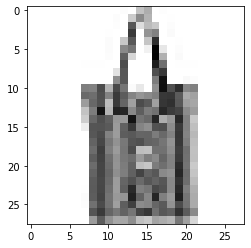

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#on peut choisir entre 0 et  59999
index=57

#nb de caractere par ligne pour l'affichage
np.set_printoptions(linewidth=320)

#affiche le nom et le titre
print(f'LABEL:{training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

#visualisationn
plt.imshow(training_images[index], cmap='Greys')

In [5]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

#on normalise l'image
training_images=training_images/255.0
test_images=test_images/255.0

In [6]:
#ce code nous montre l'idée générale
#il reduit l'entrer de manière a obtenir des mesure de proba
#il renvoie ensuite l'indice avec la plus grande proba
#ce qui correspond à l'image la plus plausible

inputs= np.array([[1.0,3.0,4.0,2.0]])
inputs=tf.convert_to_tensor(inputs)
inputs
print(f'input to softmax function:{inputs.numpy()}')

#nourie les entrer de la fonction softmax
outputs=tf.keras.activations.softmax(inputs)
print(f'output to softmax function:{outputs.numpy()}')

#obtient la somme de toutes les valeurs de la fonction softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

#on obtient l'index avec la valelur la plus haute
prediction=np.argmax(outputs)
print(f' classe avec la plus grande probabilité:{prediction}')


input to softmax function:[[1. 3. 4. 2.]]
output to softmax function:[[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
 classe avec la plus grande probabilité:2


In [7]:
model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images,training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4972 - accuracy: 0.8265
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3739 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3367 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3133 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 2s 879us/step - loss: 0.2934 - accuracy: 0.8913


In [8]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 704us/step - loss: 0.3523 - accuracy: 0.8744


[0.3522889316082001, 0.8744000196456909]

In [9]:
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

[2.9403830e-06 1.3930767e-07 2.3205030e-07 3.4953523e-08 2.7186303e-07 5.5245659e-03 8.1070476e-07 4.3554500e-02 1.8279354e-05 9.5089829e-01]
9


In [10]:
import tensorflow as tf

mnist=tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels)= mnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0

model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                        tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classification=model.predict(test_images)
print(classification[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1845
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0749
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0490
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0349
Epoch 5/5
313/313 [==============================] - 0s 907us/step - loss: 0.0623
[2.28289176e-11 1.08785747e-09 1.18581689e-09 3.78589903e-07 4.62645222e-13 2.05459573e-11 8.28226647e-14 9.99999523e-01 1.08718694e-10 6.63703403e-08]
7


In [11]:
mnist=tf.keras.datasets.mnist

(training_images, training_labels),(test_images,test_labels)=mnist.load_data()


training_images=training_images/255.0
test_images=test_images/255.0

model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(64,activation=tf.nn.relu),
                                 tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels,epochs=5)

model.evaluate(test_images,test_labels)

classification=model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3009
Epoch 2/5
1875/1875 [==============================] - 1s 781us/step - loss: 0.1477
Epoch 3/5
1875/1875 [==============================] - 1s 778us/step - loss: 0.1067
Epoch 4/5
1875/1875 [==============================] - 1s 780us/step - loss: 0.0831
Epoch 5/5
313/313 [==============================] - 0s 704us/step - loss: 0.1049
[2.9403830e-06 1.3930767e-07 2.3205030e-07 3.4953523e-08 2.7186303e-07 5.5245659e-03 8.1070476e-07 4.3554500e-02 1.8279354e-05 9.5089829e-01]
7
